# Data Analysis and visualization Project

**- GROUP MEMBERS -**

**ADITYA (20/49002)**

**IMPORTING REQUIRED LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

**IMPORTING DATASET**

In [2]:
df = pd.read_csv("playstore-analysis.csv")
df = pd.DataFrame(df)
df = df.drop(['Type', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",0,Everyone,Art & Design;Creativity


**DESCRIBING THE DATASET**

In [4]:
print(df.describe(), " \n ")
print(df.shape, "\n")
print(df.info, "\n")
print(df.columns)

            Rating       Reviews           Size
count  9366.000000  1.084000e+04   10840.000000
mean      4.191757  4.441529e+05   21516.529524
std       0.515219  2.927761e+06   20747.494577
min       1.000000  0.000000e+00       8.500000
25%       4.000000  3.800000e+01    5900.000000
50%       4.300000  2.094000e+03   18000.000000
75%       4.500000  5.477550e+04   26000.000000
max       5.000000  7.815831e+07  100000.000000  
 
(10840, 9) 

<bound method DataFrame.info of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                              

# **DATA PRE-PROCESSING**

**1.GETTING RID OF NULL VALUES**

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       0
Genres               0
dtype: int64

In [6]:
# There are 1474 missing values in Rating column. So, Droping those rows because rating is our target variable.
df.dropna(how='any', subset=['Rating'], axis=0, inplace = True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
Genres            0
dtype: int64

**2.CHANGING THE DATATYPE OF REQUIRED COLUMNS AND REPLACING THE UNWANTED VALUES WITH BLANK**

**A) Column = INSTALLS**

In [7]:
install = []
for j in df['Installs']:
    install.append(j.replace(',','').replace('+','').strip())
df['Installs']= install
df['Installs']= df['Installs'].astype('int')

**B) Column = PRICE**

In [8]:
price = []
for j in df['Price']:
    price.append(j.replace('$','').strip())
df['Price']= price
df['Price']= df['Price'].astype('float')

**C) Column = REVIEWS**

In [9]:
df['Reviews']= df['Reviews'].astype('int')

 **3.HANDLING OUTLIERS**

**A)Removing columns where Reviews is greater than installs.**

In [10]:
temp = df.loc[df['Reviews'] > df['Installs']].index
df.drop(labels=temp, inplace=True)

**B)Column -> CONTENT RATING**

In [11]:
df['Content Rating'].value_counts()

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [12]:
temp1 = df[df["Content Rating"] == 'Adults only 18+'].index
df.drop(labels=temp1, inplace=True)

temp2 = df[df["Content Rating"] == 'Unrated'].index
df.drop(labels=temp2, inplace=True)

# EDA (EXPLORATORY DATA ANALYSIS)

# 1)UNIVARIATE ANALYSIS

**A) BarPlot to represent the different categories of apps**

<AxesSubplot:>

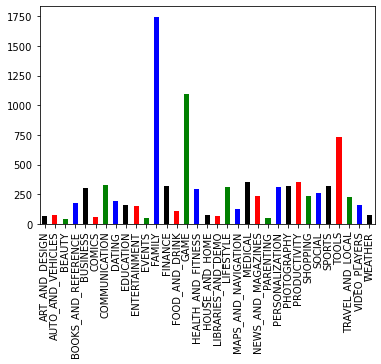

In [13]:
a=df['Category'].value_counts().sort_index(ascending=True)
a.plot.bar(color=['black', 'red', 'green', 'blue'])

**B) Histogram to represent apps of with different ratings**

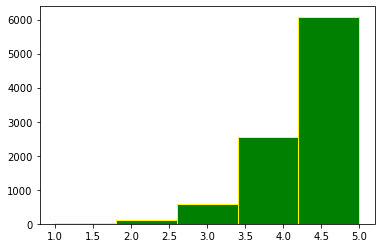

In [14]:
plt.hist(df.Rating, bins=5, edgecolor="yellow", color="green")
plt.show()

**C) Pie Chart to determine which content is mostly downloaded from playstore**

<AxesSubplot:ylabel='Content Rating'>

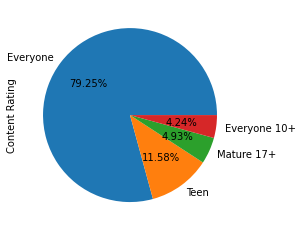

In [15]:
d=df['Content Rating'].value_counts()
d.plot.pie(autopct='%1.2f%%')

# 2) BI-VARIATE ANALYSIS

**A) Scatter Plot between paid Apps and of its categories**

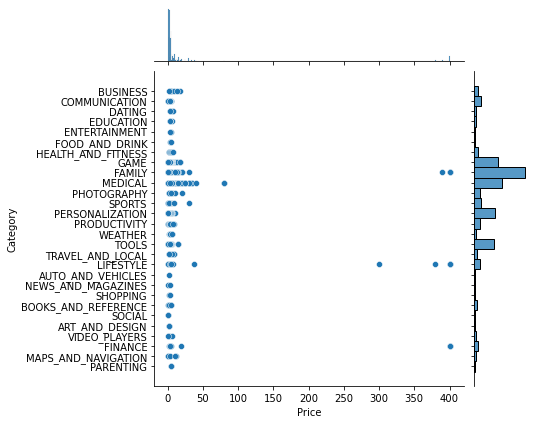

In [16]:
dfx = df.loc[df.Price != 0]
sns.jointplot(x='Price', y='Category', data=dfx, kind='scatter')
plt.show()

**B) Joint Plot between Price and Rating**

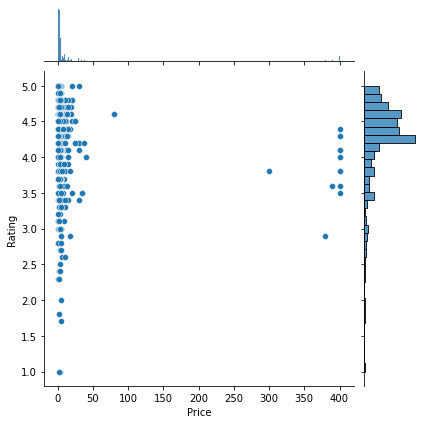

In [17]:
sns.jointplot(x='Price', y='Rating', data=dfx, kind='scatter')
plt.show()

**C) Rating vs Content Rating**

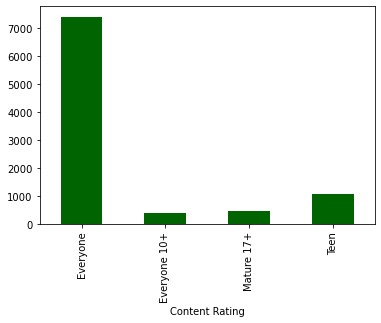

In [18]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkgreen")
plt.show()

# 3) MULTI-VARIATE ANALYSIS

**A) Correlation between all the numeric datatype**

In [19]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068399,0.078886,0.051636,-0.021899
Reviews,0.068399,1.000000,0.125459,0.641600,-0.009826
Size,0.078886,0.125459,1.000000,0.075375,-0.025648
Installs,0.051636,0.641600,0.075375,1.000000,-0.011898
Price,-0.021899,-0.009826,-0.025648,-0.011898,1.000000


**B) Covariance between all the numeric datatype**

In [20]:
df.cov()

,Rating,Reviews,Size,Installs,Price
Rating,2.652584e-01,1.108202e+05,8.659389e+02,2.427763e+06,-1.784912e-01
Reviews,1.108202e+05,9.896324e+12,8.411898e+09,1.842567e+14,-4.892001e+05
Size,8.659389e+02,8.411898e+09,4.542664e+08,1.466572e+11,-8.651026e+03
Installs,2.427763e+06,1.842567e+14,1.466572e+11,8.333832e+15,-1.718920e+07
Price,-1.784912e-01,-4.892001e+05,-8.651026e+03,-1.718920e+07,2.504575e+02


# QUERIES

# 1) What category is preferred the most?

In [21]:
a = df['Category'].value_counts()
most_preffered_category = a.iloc[:1]
most_preffered_category

FAMILY    1747
Name: Category, dtype: int64

**Conclusion:- As we can see that "Family" category tops the list.**

# 2) What are the top 5 paid apps in terms of rating and installs?

In [22]:
df2 = df[df.Price != 0]
df2_1 = df2.nlargest(5, ['Rating'])
df2_1[['App', 'Genres']]

,App,Genres
2262,Super Hearing Secret Voices Recorder PRO,Medical
2271,FHR 5-Tier 2.0,Medical
3957,ADS-B Driver,Tools
4452,P-Home for KLWP,Personalization
4477,Android P Style Icon Pack,Personalization


**Conclusion:- The top 5 paid apps belongs to Medical, Tools and Personalization. So, We can say that people are more concious toward their health and if we talk about Personalization we say that people want to customize the thing accordingly**

In [23]:
df2_2 = df2.nlargest(5, ['Installs'])
df2_2[['App','Genres']] 

,App,Genres
2241,Minecraft,Arcade;Action & Adventure
4034,Hitman Sniper,Action
4347,Minecraft,Arcade;Action & Adventure
2242,Card Wars - Adventure Time,Card;Action & Adventure
2883,Facetune - For Free,Photography


**Conclusion:- Mostly top paid apps are Gaming apps with genre Arcade, Action & Adventure** 

# 3) Which 5 categories have engaged teens more?


In [24]:
df3 = df[df['Content Rating'] == "Teen"]
a = df3['Category'].value_counts()
most_teen = a.iloc[:5]
most_teen

GAME             324
FAMILY           242
SOCIAL           105
ENTERTAINMENT     96
SHOPPING          48
Name: Category, dtype: int64

**Conclusion:- As obvious, Teens are more likely to enjoy gaming apps.**

# 4) What is the Category of Apps having size more than 90MB.

In [25]:
dfs = df[df["Size"] > 92160]
dfs['Category'].value_counts()

GAME                  77
FAMILY                58
HEALTH_AND_FITNESS     6
SPORTS                 4
FINANCE                3
MEDICAL                3
LIBRARIES_AND_DEMO     2
LIFESTYLE              2
PARENTING              2
EDUCATION              1
SHOPPING               1
TOOLS                  1
SOCIAL                 1
PHOTOGRAPHY            1
AUTO_AND_VEHICLES      1
Name: Category, dtype: int64

**Conclusion:- Gaming apps requires more storage as compared to other apps and it is obvious because they tend to have more HD graphics.**

# 5) Genres of expensive Apps (Apps of price greater than 200).

In [26]:
dfp = df.loc[df['Price'] > 200]
dfp['Genres'].value_counts()

Finance          6
Lifestyle        5
Entertainment    4
Name: Genres, dtype: int64

**Conclusion:-In this modern world, They love to maintain their standard of living that'swhy they spend more money on these type of apps.**